# 🧠 Single Qubit States

In this notebook, we will explore the single qubit states and their representation.

## 🚀 Qubit States

A qubit is a quantum bit, the basic unit of quantum information. Unlike a classical bit, which can be either 0 or 1, a qubit can be in a superposition of both states. The state of a qubit can be represented as:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

where:
- $|\psi\rangle$ is the state vector of the qubit.
- $|0\rangle$ and $|1\rangle$ are the basis states (also called computational basis states).
- $\alpha$ and $\beta$ are complex numbers that represent the probability amplitudes of the qubit being in state $|0\rangle$ and $|1\rangle$, respectively.
- The probabilities of measuring the qubit in state $|0\rangle$ and $|1\rangle$ are given by $|\alpha|^2$ and $|\beta|^2$, respectively.
- The normalization condition requires that $|\alpha|^2 + |\beta|^2 = 1$.

In [1]:
import numpy as np

# Define complex amplitudes alpha and beta (must satisfy normalization)
alpha = 1/np.sqrt(3) + 0j             # example: real amplitude
beta = np.sqrt(2/3) * 1j              # example: imaginary amplitude
print(f"alpha: {alpha}, beta: {beta}")

# Calculate measurement probabilities
prob_0 = abs(alpha)**2
prob_1 = abs(beta)**2
print(f"Probability of measuring |0>: {prob_0:.4f}")
print(f"Probability of measuring |1>: {prob_1:.4f}")

# Check normalization
norm = prob_0 + prob_1
print(f"Normalization check: |alpha|^2 + |beta|^2 = {norm:.4f}")

alpha: (0.5773502691896258+0j), beta: 0.816496580927726j
Probability of measuring |0>: 0.3333
Probability of measuring |1>: 0.6667
Normalization check: |alpha|^2 + |beta|^2 = 1.0000


Obviously, there are more ways to normalize the qubit state, but this will do for now.

Given the above, we create a single qubit in a state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, where $\alpha$ and $\beta$ are complex numbers. 

We will use the `QuantumCircuit` class from Qiskit to create a single qubit as follows:

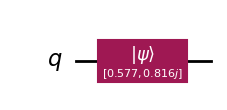

In [2]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Initialize the qubit to the state |psi> = alpha|0> + beta|1>
qc.initialize([alpha, beta], 0)  # For the first and only qubit (index 0)
qc.draw("mpl")  # Draw the circuit

This is essentially a vector in a 2D complex space.

$$
|\psi\rangle = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} = \frac{1}{\sqrt{3}}|0\rangle + i\frac{\sqrt{2}}{\sqrt{3}}|1\rangle
$$

Note: Qiskit uses $j$ instead of $i$ for the imaginary unit.

## 📊 What is a Statevector?
In Qiskit, using a Statevector allows you to observe the full quantum state of your system without performing a measurement, which would otherwise collapse the state probabilistically.

- **Simulates the pure quantum state** as a complex amplitude vector (e.g., $[1/\sqrt{2}, 1/\sqrt{2}]$ for $|+\rangle$).
- **Lets you inspect amplitudes and phases** directly — which is not possible on real hardware (since measuring destroys the superposition).
- **Used for debugging, learning, and visualization** in simulations.

### Measurement vs. Statevector:
| Action         | Effect                           | Observability |
|----------------|----------------------------------|---------------|
| `measure()`    | Collapses the state              | Yes, but only outcomes (0 or 1) |
| `Statevector`  | Pure simulation, no collapse     | Yes, full amplitudes and phases |

The point is to **"peek under the hood"** of your quantum circuit before any measurement forces the state to choose a classical outcome.

In [3]:
from qiskit.quantum_info import Statevector

# Get the statevector from the circuit
state = Statevector.from_instruction(qc)

print("Statevector:")
print(state.data)

Statevector:
[0.57735027+0.j         0.        +0.81649658j]


This statevector represents the quantum state of the system as a vector in a complex vector space as before, but in different notation:

$$
[0.57735027+0.0j,\ 0.0+0.81649658j] = \left[\frac{1}{\sqrt{3}} + 0j, 0 + i\frac{\sqrt{2}}{\sqrt{3}}\right] = \frac{1}{\sqrt{3}}|0\rangle + i\frac{\sqrt{2}}{\sqrt{3}}|1\rangle
$$

## 📌 Qubit State Representation in the Bloch sphere

In general, $\alpha$ and $\beta$ are complex numbers, which we can always write in polar form:

$$
\alpha = |\alpha| e^{i\phi_\alpha}, \quad \beta = |\beta| e^{i\phi_\beta}
$$

where $|\alpha|$ and $|\beta|$ are the magnitudes (or moduli) of the complex numbers, and $\phi_\alpha$ and $\phi_\beta$ are their respective phases.

Therefore, we can also write the qubit state as:

$$
|\psi\rangle = |\alpha| e^{i\phi_\alpha} |0\rangle + |\beta| e^{i\phi_\beta} |1\rangle
$$

We factor out the global phase $e^{i\phi_\alpha}$ since it does not affect the physical state, meaning the probability of measuring the qubit in either state won't change as $|e^{i\theta}| = e^{i\theta}e^{-i\theta} = 1$. 

Thus, we can represent the qubit state as:

$$
|\psi\rangle = e^{i\phi_\alpha} \left( |\alpha| |0\rangle + |\beta| e^{i(\phi_\beta-\phi_\alpha)} |1\rangle \right) \quad \implies \quad |\psi\rangle = |\alpha| |0\rangle + |\beta| e^{i\phi} |1\rangle
$$

where $\phi = \phi_\beta - \phi_\alpha$ is the relative phase between the two basis states, which ranges from $0$ to $2\pi$.

Since $|\alpha|$ and $|\beta|$ are real numbers and $|\alpha|^2 + |\beta|^2 = 1$ must hold, which we can represent as:

$$
|\alpha| = \cos\left(\frac{\theta}{2}\right), \quad |\beta| = \sin\left(\frac{\theta}{2}\right)
$$

where $\theta$ ranges from 0 to $\pi$.

Therefore, the state of a qubit can be represented on a sphere, known as the Bloch sphere. 

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle + e^{i\phi} \sin\left(\frac{\theta}{2}\right) |1\rangle
$$

where:
- $\theta$ is the polar angle (0 to $\pi$) and represents the latitude on the sphere.
- $\phi$ is the azimuthal angle (0 to $2\pi$) and represents the longitude on the sphere.
- The north pole of the sphere corresponds to the state $|0\rangle$, and the south pole corresponds to the state $|1\rangle$.

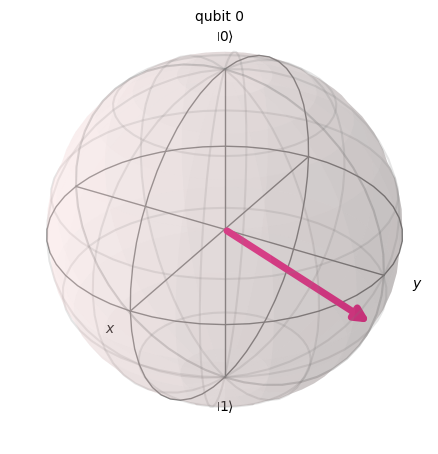

In [4]:
from qiskit.visualization import plot_bloch_multivector

# Visualize the state on the Bloch sphere
plot_bloch_multivector(state)

In this representation, the qubit state is visualized as a point on the surface of the Bloch sphere, where the angles $\theta$ and $\phi$ determine the position of the point on the sphere.

To convert this to Cartesian coordinates, we can use the following equations:

$$
\begin{aligned}
x &= \sin(\theta) \cos(\phi) \\
y &= \sin(\theta) \sin(\phi) \\
z &= \cos(\theta)
\end{aligned}
$$

From the amplitudes, the angles can be calculated as:

$$
\begin{aligned}
\cos\left(\frac{\theta}{2}\right) &= |\alpha|\\[2ex]
\frac{\theta}{2} &= \arccos(|\alpha|) \\[2ex]
\theta &= 2 \arccos\left(\frac{1}{\sqrt{3}}\right) \\[2ex]
\therefore \theta &\approx 109.47^\circ
\end{aligned}
$$

Also, we can calculate the relative phase $\phi$ between the two states $|0\rangle$ and $|1\rangle$:

$$
\begin{aligned}
\phi &= \arg(\beta) - \arg(\alpha) \\[2ex]
&= \arg\left(i\sqrt{\frac{2}{3}}\right) - \arg\left(\frac{1}{\sqrt{3}}\right) \\[2ex]
&= \frac{\pi}{2} - 0 \\[2ex]
\therefore \phi &= 90^\circ
\end{aligned}
$$

where $\arg(z)$ is the argument (phase angle) of the complex number $z$.

In [5]:
# Calculate theta and phi
theta = 2 * np.arccos(np.abs(alpha))
phi = np.angle(beta) - np.angle(alpha)

# Ensure phi is in [0, 2pi)
phi = np.mod(phi, 2*np.pi)

print(f"theta: {theta:.4f} radians, {np.degrees(theta):.2f} degrees")
print(f"phi: {phi:.4f} radians, {np.degrees(phi):.2f} degrees")


theta: 1.9106 radians, 109.47 degrees
phi: 1.5708 radians, 90.00 degrees


We have 6 specific states of the qubit:

- $|0\rangle$: North pole of the Bloch sphere, $\theta = 0$, $\phi = 0$.
- $|1\rangle$: South pole of the Bloch sphere, $\theta = \pi$, $\phi = 0$.
- $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$: Equator of the Bloch sphere, $\theta = \frac{\pi}{2}$, $\phi = 0$.
- $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$: Equator of the Bloch sphere, $\theta = \frac{\pi}{2}$, $\phi = \pi$.
- $|+i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$: Equator of the Bloch sphere, $\theta = \frac{\pi}{2}$, $\phi = \frac{\pi}{2}$.
- $|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$: Equator of the Bloch sphere, $\theta = \frac{\pi}{2}$, $\phi = \frac{3\pi}{2}$.


$|+\rangle$ can be created by applying the Hadamard gate to $|0\rangle$.

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

Therefore, 

$$
H|0\rangle = H \begin{pmatrix}
1 \\
0
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = |+\rangle
$$

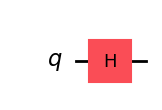

In [6]:
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard gate (|0> -> (|0> + |1>)/sqrt(2))
qc.draw('mpl')


$|-\rangle$ can be created by applying the Hadamard gate to $|0\rangle$, followed by the Pauli-Z gate.

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

Therefore,

$$
ZH|0\rangle = Z|+\rangle = Z \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
-1
\end{pmatrix} = |-\rangle
$$

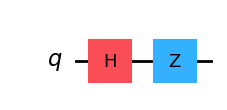

In [7]:
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard gate (|0> -> (|0> + |1>)/sqrt(2))
qc.z(0)  # Pauli-Z gate (|0> -> |0>, |1> -> -|1>)
qc.draw('mpl')

$|+i\rangle$ can be created by applying the Hadamard gate to $|0\rangle$, followed by the S gate (phase gate):

$$
S = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
$$

Therefore,

$$
SH|0\rangle = S|+\rangle = S \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
i
\end{pmatrix} = |+i\rangle
$$

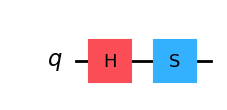

In [8]:
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard gate (|0> -> (|0> + |1>)/sqrt(2))
qc.s(0)  # S gate (|0> -> |0>, |1> -> i|1>)
qc.draw('mpl')

$|-i\rangle$ can be created by applying the Hadamard gate to $|0\rangle$, followed by the S dagger gate (phase gate):

$$
S^\dagger = \begin{pmatrix}
1 & 0 \\
0 & -i
\end{pmatrix}
$$

Therefore,

$$
S^\dagger H|0\rangle = S^\dagger|+\rangle = S^\dagger \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
-i
\end{pmatrix} = |-i\rangle
$$

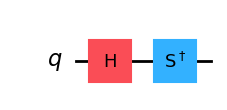

In [9]:
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard gate (|0> -> (|0> + |1>)/sqrt(2))
qc.sdg(0)  # S-dagger gate (|0> -> |0>, |1> -> -i|1>)
qc.draw('mpl')